In [1]:
# Copyright 2019-2020 Steven Mattis and Troy Butler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import beta
import scipy.integrate.quadrature as quad
from luq.luq import *
from luq.dynamical_systems import Lorenz

import ipywidgets as wd
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'axes.linewidth': 2})

np.random.seed(123456)

Model is for a Lorenz system,
$$x'(t) = \sigma (y-x),$$
$$y'(t) = x(\rho-z) - y,$$
$$z'(t) = xy - \beta z,$$
with $\sigma \in [9, 11]$, $\beta \in [2, 3]$, and $\rho \in [25, 31]$.

A ***true*** distribution of $x(0), y(0), z(0), \sigma, \rho$, and $\beta$ are defined by (non-uniform) Beta distributions and used to generate a set of time series data.

An ***initial*** uniform distribution is assumed and updated by the true time series data.

In [2]:
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(2E3)

num_params = 3
num_ics = 3

params = np.random.uniform(size=(num_samples, num_params))
ics = np.random.uniform(size=(num_samples, num_ics))

param_range = np.array([[9.0, 11.0], # sigma
                        [2.0, 3.0], # beta
                        [25.0, 31.0]]) # rho
ic_range = np.array([[2.0, 2.0], # x(0)
                     [1.0, 1.0], # y(0)
                     [1.5, 1.5]]) # z(0)
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics
param_labels = [r'$\sigma$', r'$\beta$', r'$\rho$']
ic_labels = [r'$x(0)$', r'$y(0)$', r'$z(0)$']

# Construct the predicted time series data
num_time_preds = int(501)  # number of predictions (uniformly spaced) between [time_start,time_end]
time_start = 0.0
time_end = 6.0
times = np.linspace(time_start, time_end, num_time_preds)

phys = Lorenz()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

# Simulate an observed Beta distribution of time series data
num_obs = int(3E2)

true_a = 2
true_b = 2

# data generating distributions
params_obs = np.random.beta(size=(num_obs, num_params), a=true_a, b=true_b)
ics_obs = np.random.beta(size=(num_obs, num_ics), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

In [3]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 0
time_end_idx = num_time_preds-1

num_filtered_obs = 16

# Filter data with piecewise linear splines
learn.filter_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                     num_filtered_obs=num_filtered_obs, tol=5.0e-2, min_knots=3, max_knots=10)

0 4 0.011938054365134192
0 4 knots being used with error of 0.011938054365134192
1 4 0.01316576603912532
1 4 knots being used with error of 0.01316576603912532
2 4 0.011909357347682377
2 4 knots being used with error of 0.011909357347682377
3 4 0.013510576936408072
3 4 knots being used with error of 0.013510576936408072
4 4 0.012733299207081635
4 4 knots being used with error of 0.012733299207081635
5 4 0.014504172172366074
5 4 knots being used with error of 0.014504172172366074
6 4 0.014759225891805347
6 4 knots being used with error of 0.014759225891805347
7 4 0.014727791237566304
7 4 knots being used with error of 0.014727791237566304
8 4 0.014821803920216425
8 4 knots being used with error of 0.014821803920216425
9 4 0.014383013696512051
9 4 knots being used with error of 0.014383013696512051
10 4 0.014939044460145634
10 4 knots being used with error of 0.014939044460145634
11 4 0.013172063443560178
11 4 knots being used with error of 0.013172063443560178
12 4 0.013883177751115318


101 4 0.013359774384833096
101 4 knots being used with error of 0.013359774384833096
102 4 0.012963290462744205
102 4 knots being used with error of 0.012963290462744205
103 4 0.014790400738398537
103 4 knots being used with error of 0.014790400738398537
104 4 0.013751569395771986
104 4 knots being used with error of 0.013751569395771986
105 4 0.012491151585279138
105 4 knots being used with error of 0.012491151585279138
106 4 0.014915461125237436
106 4 knots being used with error of 0.014915461125237436
107 4 0.014435707055835441
107 4 knots being used with error of 0.014435707055835441
108 4 0.012598693622614196
108 4 knots being used with error of 0.012598693622614196
109 4 0.01504962401925902
109 4 knots being used with error of 0.01504962401925902
110 4 0.014769598314572545
110 4 knots being used with error of 0.014769598314572545
111 4 0.013279395514196235
111 4 knots being used with error of 0.013279395514196235
112 4 0.012516917711209316
112 4 knots being used with error of 0.0

204 4 0.012707222092413862
204 4 knots being used with error of 0.012707222092413862
205 4 0.012516775398927467
205 4 knots being used with error of 0.012516775398927467
206 4 0.015096053145737823
206 4 knots being used with error of 0.015096053145737823
Optimization of knot locations failed. Using uniform knots.
207 4 0.020929676138919263
207 4 knots being used with error of 0.020929676138919263
208 4 0.013467238255866336
208 4 knots being used with error of 0.013467238255866336
Optimization of knot locations failed. Using uniform knots.
209 4 0.020019762257567374
209 4 knots being used with error of 0.020019762257567374
210 4 0.013467416383257174
210 4 knots being used with error of 0.013467416383257174
211 4 0.01325976896432428
211 4 knots being used with error of 0.01325976896432428
212 4 0.012780251752647673
212 4 knots being used with error of 0.012780251752647673
213 4 0.01341506584158426
213 4 knots being used with error of 0.01341506584158426
214 4 0.012131335991694135
214 4 k

303 4 0.01483422319436964
303 4 knots being used with error of 0.01483422319436964
304 4 0.014129911905744195
304 4 knots being used with error of 0.014129911905744195
305 4 0.0124175103550763
305 4 knots being used with error of 0.0124175103550763
306 4 0.013406685835313275
306 4 knots being used with error of 0.013406685835313275
307 4 0.014185727864393037
307 4 knots being used with error of 0.014185727864393037
308 4 0.013761393879963356
308 4 knots being used with error of 0.013761393879963356
309 4 0.01409071046587338
309 4 knots being used with error of 0.01409071046587338
310 4 0.012510410552654803
310 4 knots being used with error of 0.012510410552654803
311 4 0.01180230771264403
311 4 knots being used with error of 0.01180230771264403
312 4 0.01286307478068621
312 4 knots being used with error of 0.01286307478068621
313 4 0.012893421288195506
313 4 knots being used with error of 0.012893421288195506
Optimization of knot locations failed. Using uniform knots.
314 4 0.021118533

400 4 0.014991309903868988
400 4 knots being used with error of 0.014991309903868988
401 4 0.014376005892314584
401 4 knots being used with error of 0.014376005892314584
Optimization of knot locations failed. Using uniform knots.
402 4 0.02018590708539118
402 4 knots being used with error of 0.02018590708539118
403 4 0.012081603647221132
403 4 knots being used with error of 0.012081603647221132
404 4 0.012332541127806263
404 4 knots being used with error of 0.012332541127806263
405 4 0.014420856202311781
405 4 knots being used with error of 0.014420856202311781
406 4 0.013926402724578697
406 4 knots being used with error of 0.013926402724578697
407 4 0.013682632262607594
407 4 knots being used with error of 0.013682632262607594
408 4 0.014784936226138717
408 4 knots being used with error of 0.014784936226138717
409 4 0.013690275158890885
409 4 knots being used with error of 0.013690275158890885
410 4 0.012075648820659495
410 4 knots being used with error of 0.012075648820659495
411 4 0

496 4 0.013847902486776963
496 4 knots being used with error of 0.013847902486776963
497 4 0.012000981204597262
497 4 knots being used with error of 0.012000981204597262
498 4 0.013702683573481821
498 4 knots being used with error of 0.013702683573481821
499 4 0.013756500295424308
499 4 knots being used with error of 0.013756500295424308
500 4 0.012884827720708472
500 4 knots being used with error of 0.012884827720708472
501 4 0.014522452098572999
501 4 knots being used with error of 0.014522452098572999
502 4 0.012619496500656274
502 4 knots being used with error of 0.012619496500656274
503 4 0.014973151254925762
503 4 knots being used with error of 0.014973151254925762
504 4 0.013445807096332602
504 4 knots being used with error of 0.013445807096332602
505 4 0.01324915834785678
505 4 knots being used with error of 0.01324915834785678
506 4 0.011391412265929244
506 4 knots being used with error of 0.011391412265929244
507 4 0.012863131703734081
507 4 knots being used with error of 0.0

594 4 0.012327164023017857
594 4 knots being used with error of 0.012327164023017857
595 4 0.013141741525854966
595 4 knots being used with error of 0.013141741525854966
596 4 0.014877845099243794
596 4 knots being used with error of 0.014877845099243794
597 4 0.012713528684403274
597 4 knots being used with error of 0.012713528684403274
598 4 0.013186860161923707
598 4 knots being used with error of 0.013186860161923707
599 4 0.012589696980240463
599 4 knots being used with error of 0.012589696980240463
Optimization of knot locations failed. Using uniform knots.
600 4 0.014419483116682124
600 4 knots being used with error of 0.014419483116682124
601 4 0.011791904506781541
601 4 knots being used with error of 0.011791904506781541
602 4 0.013554321505651622
602 4 knots being used with error of 0.013554321505651622
603 4 0.012124476420202186
603 4 knots being used with error of 0.012124476420202186
604 4 0.01335392333330793
604 4 knots being used with error of 0.01335392333330793
605 4 0

693 4 0.0139744241521964
693 4 knots being used with error of 0.0139744241521964
694 4 0.013561041465368724
694 4 knots being used with error of 0.013561041465368724
695 4 0.011821355420316823
695 4 knots being used with error of 0.011821355420316823
696 4 0.013475720630288818
696 4 knots being used with error of 0.013475720630288818
697 4 0.013805261695946343
697 4 knots being used with error of 0.013805261695946343
698 4 0.01415157830986729
698 4 knots being used with error of 0.01415157830986729
699 4 0.014056882317172234
699 4 knots being used with error of 0.014056882317172234
700 4 0.01246695179468491
700 4 knots being used with error of 0.01246695179468491
701 4 0.014109661987369685
701 4 knots being used with error of 0.014109661987369685
702 4 0.011655146129626414
702 4 knots being used with error of 0.011655146129626414
703 4 0.012111244690473914
703 4 knots being used with error of 0.012111244690473914
704 4 0.013084405416358129
704 4 knots being used with error of 0.0130844

790 4 0.013926158999022671
790 4 knots being used with error of 0.013926158999022671
791 4 0.012680045081564515
791 4 knots being used with error of 0.012680045081564515
792 4 0.012131494454595373
792 4 knots being used with error of 0.012131494454595373
793 4 0.014094543226404611
793 4 knots being used with error of 0.014094543226404611
794 4 0.013015833837057737
794 4 knots being used with error of 0.013015833837057737
795 4 0.012494146607629505
795 4 knots being used with error of 0.012494146607629505
796 4 0.01386568121403519
796 4 knots being used with error of 0.01386568121403519
797 4 0.011914652519277357
797 4 knots being used with error of 0.011914652519277357
798 4 0.014910955583582962
798 4 knots being used with error of 0.014910955583582962
799 4 0.011680238318706487
799 4 knots being used with error of 0.011680238318706487
800 4 0.013898652754660313
800 4 knots being used with error of 0.013898652754660313
801 4 0.014594962093379276
801 4 knots being used with error of 0.0

888 4 0.012009631155549079
888 4 knots being used with error of 0.012009631155549079
889 4 0.013521124619102282
889 4 knots being used with error of 0.013521124619102282
890 4 0.013785647716300265
890 4 knots being used with error of 0.013785647716300265
891 4 0.014102459396196535
891 4 knots being used with error of 0.014102459396196535
892 4 0.014003265987897936
892 4 knots being used with error of 0.014003265987897936
893 4 0.013153272549524921
893 4 knots being used with error of 0.013153272549524921
894 4 0.011951989104343872
894 4 knots being used with error of 0.011951989104343872
895 4 0.013581271823233114
895 4 knots being used with error of 0.013581271823233114
896 4 0.014307399496406746
896 4 knots being used with error of 0.014307399496406746
897 4 0.013032851890911875
897 4 knots being used with error of 0.013032851890911875
898 4 0.01180453643380227
898 4 knots being used with error of 0.01180453643380227
899 4 0.01434863499482595
899 4 knots being used with error of 0.01

988 4 0.012979682641565333
988 4 knots being used with error of 0.012979682641565333
989 4 0.014721489276327777
989 4 knots being used with error of 0.014721489276327777
990 4 0.01222181304717365
990 4 knots being used with error of 0.01222181304717365
991 4 0.012563049240766186
991 4 knots being used with error of 0.012563049240766186
992 4 0.0127212575933696
992 4 knots being used with error of 0.0127212575933696
993 4 0.012312158302210732
993 4 knots being used with error of 0.012312158302210732
994 4 0.01461029578975098
994 4 knots being used with error of 0.01461029578975098
995 4 0.015103252260923301
995 4 knots being used with error of 0.015103252260923301
996 4 0.013949160879080715
996 4 knots being used with error of 0.013949160879080715
997 4 0.012263678090629605
997 4 knots being used with error of 0.012263678090629605
998 4 0.014928458774433606
998 4 knots being used with error of 0.014928458774433606
999 4 0.013781154155238168
999 4 knots being used with error of 0.0137811

1082 4 0.012960362311229042
1082 4 knots being used with error of 0.012960362311229042
1083 4 0.013569602093478175
1083 4 knots being used with error of 0.013569602093478175
1084 4 0.013797095749654964
1084 4 knots being used with error of 0.013797095749654964
1085 4 0.013322882125511719
1085 4 knots being used with error of 0.013322882125511719
1086 4 0.014248741839221833
1086 4 knots being used with error of 0.014248741839221833
1087 4 0.01195449107756629
1087 4 knots being used with error of 0.01195449107756629
1088 4 0.014341891968928986
1088 4 knots being used with error of 0.014341891968928986
1089 4 0.014582776282198777
1089 4 knots being used with error of 0.014582776282198777
1090 4 0.013351689512153396
1090 4 knots being used with error of 0.013351689512153396
1091 4 0.012507807921343712
1091 4 knots being used with error of 0.012507807921343712
1092 4 0.012284652357677582
1092 4 knots being used with error of 0.012284652357677582
1093 4 0.014702518788258196
1093 4 knots bein

1181 4 0.01276796922408739
1181 4 knots being used with error of 0.01276796922408739
1182 4 0.01291646404913138
1182 4 knots being used with error of 0.01291646404913138
1183 4 0.013014000189163447
1183 4 knots being used with error of 0.013014000189163447
Optimization of knot locations failed. Using uniform knots.
1184 4 0.020743138355717776
1184 4 knots being used with error of 0.020743138355717776
1185 4 0.012451875021128402
1185 4 knots being used with error of 0.012451875021128402
1186 4 0.012202390184282279
1186 4 knots being used with error of 0.012202390184282279
1187 4 0.012968090247785759
1187 4 knots being used with error of 0.012968090247785759
1188 4 0.014176627999161863
1188 4 knots being used with error of 0.014176627999161863
1189 4 0.012677055806064355
1189 4 knots being used with error of 0.012677055806064355
1190 4 0.012948736839722847
1190 4 knots being used with error of 0.012948736839722847
Optimization of knot locations failed. Using uniform knots.
1191 4 0.02044

1280 4 0.013032313444355171
1280 4 knots being used with error of 0.013032313444355171
1281 4 0.012680863189431273
1281 4 knots being used with error of 0.012680863189431273
1282 4 0.013686631826601002
1282 4 knots being used with error of 0.013686631826601002
1283 4 0.014262233426131839
1283 4 knots being used with error of 0.014262233426131839
1284 4 0.013511684265151458
1284 4 knots being used with error of 0.013511684265151458
1285 4 0.013008136730751536
1285 4 knots being used with error of 0.013008136730751536
1286 4 0.014280971162302295
1286 4 knots being used with error of 0.014280971162302295
1287 4 0.013512119392304598
1287 4 knots being used with error of 0.013512119392304598
1288 4 0.014370346986686872
1288 4 knots being used with error of 0.014370346986686872
1289 4 0.012722806418750295
1289 4 knots being used with error of 0.012722806418750295
1290 4 0.014324748332420348
1290 4 knots being used with error of 0.014324748332420348
1291 4 0.013988605264388778
1291 4 knots be

1376 4 0.012406767472511793
1376 4 knots being used with error of 0.012406767472511793
Optimization of knot locations failed. Using uniform knots.
1377 4 0.020801014541964213
1377 4 knots being used with error of 0.020801014541964213
1378 4 0.01494885348350817
1378 4 knots being used with error of 0.01494885348350817
1379 4 0.011743624143643406
1379 4 knots being used with error of 0.011743624143643406
1380 4 0.012982993174570561
1380 4 knots being used with error of 0.012982993174570561
1381 4 0.01348965834107229
1381 4 knots being used with error of 0.01348965834107229
1382 4 0.013040229581684515
1382 4 knots being used with error of 0.013040229581684515
1383 4 0.014765745629678098
1383 4 knots being used with error of 0.014765745629678098
1384 4 0.014917219802601828
1384 4 knots being used with error of 0.014917219802601828
1385 4 0.01186031127997092
1385 4 knots being used with error of 0.01186031127997092
1386 4 0.013618734379127381
1386 4 knots being used with error of 0.01361873

1476 4 0.015122991217921468
1476 4 knots being used with error of 0.015122991217921468
1477 4 0.012376147780120264
1477 4 knots being used with error of 0.012376147780120264
1478 4 0.012758577159729077
1478 4 knots being used with error of 0.012758577159729077
1479 4 0.012770293573388042
1479 4 knots being used with error of 0.012770293573388042
1480 4 0.012253067594373654
1480 4 knots being used with error of 0.012253067594373654
1481 4 0.014058028185475607
1481 4 knots being used with error of 0.014058028185475607
1482 4 0.013388895893755973
1482 4 knots being used with error of 0.013388895893755973
1483 4 0.014676646197321563
1483 4 knots being used with error of 0.014676646197321563
1484 4 0.011967904312943532
1484 4 knots being used with error of 0.011967904312943532
1485 4 0.011952371227843749
1485 4 knots being used with error of 0.011952371227843749
1486 4 0.011971762977306732
1486 4 knots being used with error of 0.011971762977306732
1487 4 0.013325585242991673
1487 4 knots be

1577 4 0.0135058009113888
1577 4 knots being used with error of 0.0135058009113888
1578 4 0.012939539267045445
1578 4 knots being used with error of 0.012939539267045445
1579 4 0.014215067951659253
1579 4 knots being used with error of 0.014215067951659253
1580 4 0.012633212814287791
1580 4 knots being used with error of 0.012633212814287791
1581 4 0.012052833000683038
1581 4 knots being used with error of 0.012052833000683038
1582 4 0.0126226063251881
1582 4 knots being used with error of 0.0126226063251881
1583 4 0.011903775755936253
1583 4 knots being used with error of 0.011903775755936253
1584 4 0.014721037039506639
1584 4 knots being used with error of 0.014721037039506639
1585 4 0.013570969539864369
1585 4 knots being used with error of 0.013570969539864369
1586 4 0.012495005369572435
1586 4 knots being used with error of 0.012495005369572435
1587 4 0.013903354404520672
1587 4 knots being used with error of 0.013903354404520672
1588 4 0.013989042930692431
1588 4 knots being used

1676 4 0.01336530847415712
1676 4 knots being used with error of 0.01336530847415712
1677 4 0.01434270485666559
1677 4 knots being used with error of 0.01434270485666559
1678 4 0.013696223132909486
1678 4 knots being used with error of 0.013696223132909486
1679 4 0.012894421355543582
1679 4 knots being used with error of 0.012894421355543582
1680 4 0.012611292705203656
1680 4 knots being used with error of 0.012611292705203656
1681 4 0.013758766659458202
1681 4 knots being used with error of 0.013758766659458202
1682 4 0.012846436667963415
1682 4 knots being used with error of 0.012846436667963415
1683 4 0.013098463353654291
1683 4 knots being used with error of 0.013098463353654291
1684 4 0.014213378052546124
1684 4 knots being used with error of 0.014213378052546124
Optimization of knot locations failed. Using uniform knots.
1685 4 0.014027012977430468
1685 4 knots being used with error of 0.014027012977430468
1686 4 0.013633229805233201
1686 4 knots being used with error of 0.013633

1774 4 0.01337482649346627
1774 4 knots being used with error of 0.01337482649346627
1775 4 0.012760043257394446
1775 4 knots being used with error of 0.012760043257394446
1776 4 0.012900530803728515
1776 4 knots being used with error of 0.012900530803728515
1777 4 0.013232378625148736
1777 4 knots being used with error of 0.013232378625148736
1778 4 0.014480087612288388
1778 4 knots being used with error of 0.014480087612288388
1779 4 0.014476968158903336
1779 4 knots being used with error of 0.014476968158903336
1780 4 0.012314061193609735
1780 4 knots being used with error of 0.012314061193609735
1781 4 0.01369296643378676
1781 4 knots being used with error of 0.01369296643378676
1782 4 0.014563608530353279
1782 4 knots being used with error of 0.014563608530353279
1783 4 0.013784207431232282
1783 4 knots being used with error of 0.013784207431232282
1784 4 0.013039341280364974
1784 4 knots being used with error of 0.013039341280364974
1785 4 0.014458011959806715
1785 4 knots being 

1870 4 0.014244851528355503
1870 4 knots being used with error of 0.014244851528355503
1871 4 0.015071437388061496
1871 4 knots being used with error of 0.015071437388061496
1872 4 0.014635044641205179
1872 4 knots being used with error of 0.014635044641205179
1873 4 0.012450725833300442
1873 4 knots being used with error of 0.012450725833300442
1874 4 0.015149719556482031
1874 4 knots being used with error of 0.015149719556482031
1875 4 0.014438653323040939
1875 4 knots being used with error of 0.014438653323040939
1876 4 0.00811768008431849
1876 4 knots being used with error of 0.00811768008431849
1877 4 0.012925241316528013
1877 4 knots being used with error of 0.012925241316528013
1878 4 0.013979953860879024
1878 4 knots being used with error of 0.013979953860879024
1879 4 0.013026006580920046
1879 4 knots being used with error of 0.013026006580920046
1880 4 0.014159823860400584
1880 4 knots being used with error of 0.014159823860400584
1881 4 0.014851430104267361
1881 4 knots bein

1971 4 0.014084232843849433
1971 4 knots being used with error of 0.014084232843849433
1972 4 0.013997140258987498
1972 4 knots being used with error of 0.013997140258987498
1973 4 0.013724838422518208
1973 4 knots being used with error of 0.013724838422518208
1974 4 0.012643188673704675
1974 4 knots being used with error of 0.012643188673704675
1975 4 0.013260510084577598
1975 4 knots being used with error of 0.013260510084577598
1976 4 0.012725060878459045
1976 4 knots being used with error of 0.012725060878459045
1977 4 0.013146060395976978
1977 4 knots being used with error of 0.013146060395976978
1978 4 0.012293304641600781
1978 4 knots being used with error of 0.012293304641600781
1979 4 0.014229979402110973
1979 4 knots being used with error of 0.014229979402110973
1980 4 0.013639408750269122
1980 4 knots being used with error of 0.013639408750269122
1981 4 0.014303382865477486
1981 4 knots being used with error of 0.014303382865477486
1982 4 0.01421439015380608
1982 4 knots bei

75 4 0.01267497612564796
75 4 knots being used with error of 0.01267497612564796
76 4 0.013958095398496595
76 4 knots being used with error of 0.013958095398496595
77 4 0.013543043310875618
77 4 knots being used with error of 0.013543043310875618
78 4 0.013248877935867674
78 4 knots being used with error of 0.013248877935867674
79 4 0.015050532879922448
79 4 knots being used with error of 0.015050532879922448
80 4 0.014872991818334963
80 4 knots being used with error of 0.014872991818334963
81 4 0.011859289735848995
81 4 knots being used with error of 0.011859289735848995
82 4 0.012990289466599702
82 4 knots being used with error of 0.012990289466599702
83 4 0.014009933003430694
83 4 knots being used with error of 0.014009933003430694
84 4 0.012177968064096116
84 4 knots being used with error of 0.012177968064096116
85 4 0.01480913734907314
85 4 knots being used with error of 0.01480913734907314
86 4 0.014005264181770012
86 4 knots being used with error of 0.014005264181770012
87 4 0.0

174 4 0.01278535963564891
174 4 knots being used with error of 0.01278535963564891
175 4 0.01356708083985145
175 4 knots being used with error of 0.01356708083985145
176 4 0.012453046963211884
176 4 knots being used with error of 0.012453046963211884
177 4 0.011951639764147823
177 4 knots being used with error of 0.011951639764147823
178 4 0.012609933945698521
178 4 knots being used with error of 0.012609933945698521
179 4 0.014044260939282696
179 4 knots being used with error of 0.014044260939282696
180 4 0.013935098428836125
180 4 knots being used with error of 0.013935098428836125
181 4 0.013336114301147572
181 4 knots being used with error of 0.013336114301147572
182 4 0.01368781083573388
182 4 knots being used with error of 0.01368781083573388
183 4 0.012344533560719217
183 4 knots being used with error of 0.012344533560719217
184 4 0.013747522513013597
184 4 knots being used with error of 0.013747522513013597
185 4 0.013880890860066277
185 4 knots being used with error of 0.01388

274 4 0.013491906165041293
274 4 knots being used with error of 0.013491906165041293
275 4 0.01315262540712704
275 4 knots being used with error of 0.01315262540712704
276 4 0.014060855813681952
276 4 knots being used with error of 0.014060855813681952
277 4 0.01435900483911073
277 4 knots being used with error of 0.01435900483911073
278 4 0.01477660992481236
278 4 knots being used with error of 0.01477660992481236
279 4 0.012250920619904376
279 4 knots being used with error of 0.012250920619904376
280 4 0.01313530256425102
280 4 knots being used with error of 0.01313530256425102
281 4 0.012445412321062022
281 4 knots being used with error of 0.012445412321062022
282 4 0.012495689032473263
282 4 knots being used with error of 0.012495689032473263
283 4 0.013307519804252106
283 4 knots being used with error of 0.013307519804252106
284 4 0.012937186775905425
284 4 knots being used with error of 0.012937186775905425
285 4 0.012286065105668069
285 4 knots being used with error of 0.0122860

(array([[0.65702131, 2.09358349, 3.53014566, ..., 7.22863353, 7.22937696,
         7.23012039],
        [0.78722029, 1.70162263, 2.61602497, ..., 6.10007112, 6.10363035,
         6.10718957],
        [0.69522301, 2.00683551, 3.31844802, ..., 6.88328334, 6.88435602,
         6.88542869],
        ...,
        [0.67119685, 2.02564755, 3.38009826, ..., 6.94009568, 6.94137865,
         6.94266163],
        [0.68572788, 1.86102787, 3.03632786, ..., 7.07321503, 7.07556945,
         7.07792386],
        [0.79662576, 1.59699432, 2.39736289, ..., 6.07575909, 6.08192354,
         6.088088  ]]),
 array([[0.69681045, 1.86969508, 3.04257972, ..., 6.93784179, 6.93993322,
         6.94202464],
        [0.6883949 , 1.87883296, 3.06927102, ..., 6.88971916, 6.89179567,
         6.89387218],
        [0.79666486, 1.67485686, 2.55304887, ..., 6.05277479, 6.05679119,
         6.06080758],
        ...,
        [0.74652306, 1.77038513, 2.7942472 , ..., 6.42677342, 6.42974672,
         6.43272001],
        [0.8

In [4]:
# learn and classify dynamics
# learn.dynamics(cluster_method='gmm', kwargs={'n_components': 3})
learn.dynamics(kwargs={'n_clusters': 2, 'n_init': 10})

0.0025 misclassification rate for  {'kernel': 'linear'}
0.003 misclassification rate for  {'kernel': 'rbf'}
0.0005 misclassification rate for  {'kernel': 'poly'}
0.46449999999999997 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'poly'}
Misclassification rate is  0.0005


Text(0.5, 1.0, 'Approximating Dynamics')

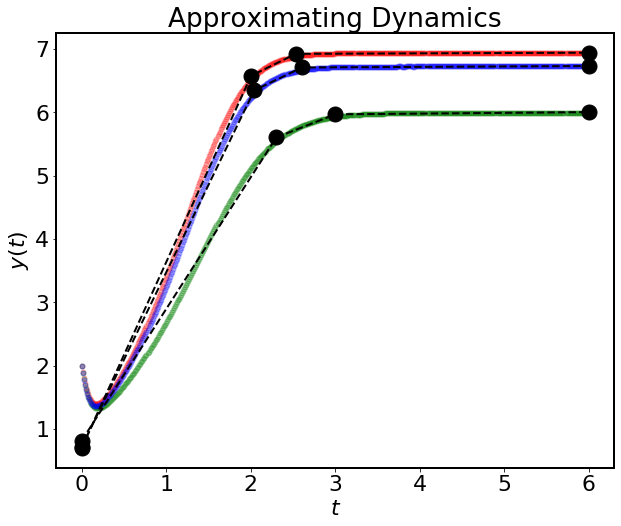

In [5]:
fig = plt.figure(figsize=(10,8))

chosen_obs = [0, 8, 10]
colors = ['r', 'g', 'b']

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    num_i_knots = int(0.5*(2+len(learn.obs_knots[i])))
    knots = np.copy(learn.obs_knots[i][num_i_knots:])
    knots = np.insert(knots, 0, learn.times[time_start_idx])
    knots = np.append(knots, learn.times[time_end_idx])
    plt.plot(knots, learn.obs_knots[i][:num_i_knots], 'k', linestyle='dashed', markersize=15, marker='o', linewidth=2)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Approximating Dynamics')    

Text(0.5, 1.0, 'Generating Filtered Data')

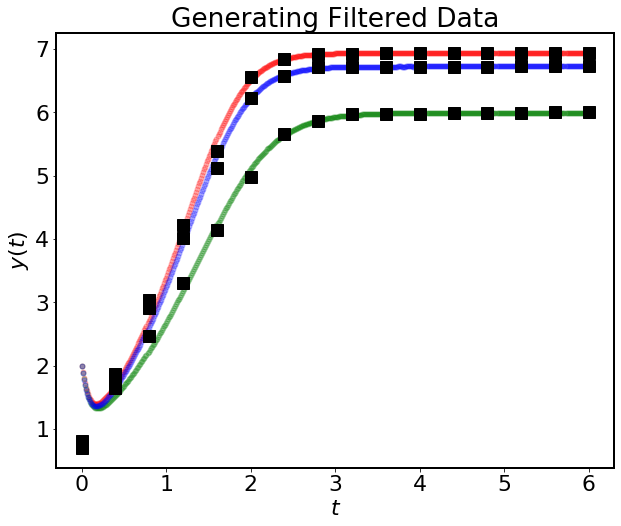

In [6]:
fig = plt.figure(figsize=(10,8))

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    plt.plot(learn.filtered_times, learn.filtered_obs[i,:],'k', linestyle='none', marker='s', 
            markersize=12)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Generating Filtered Data')    

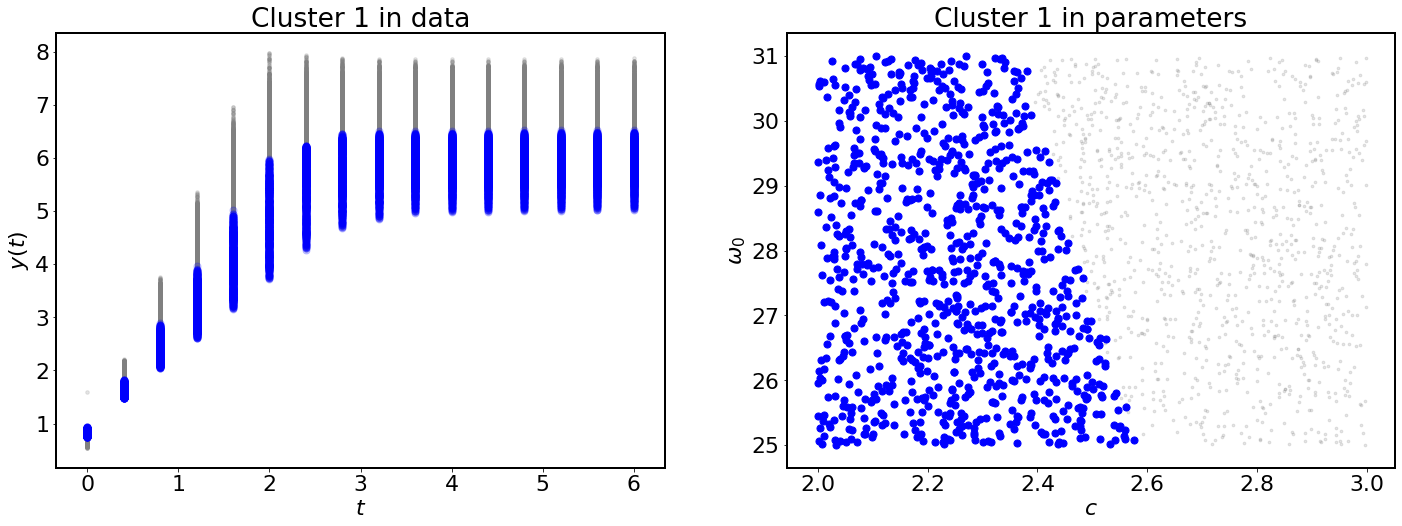

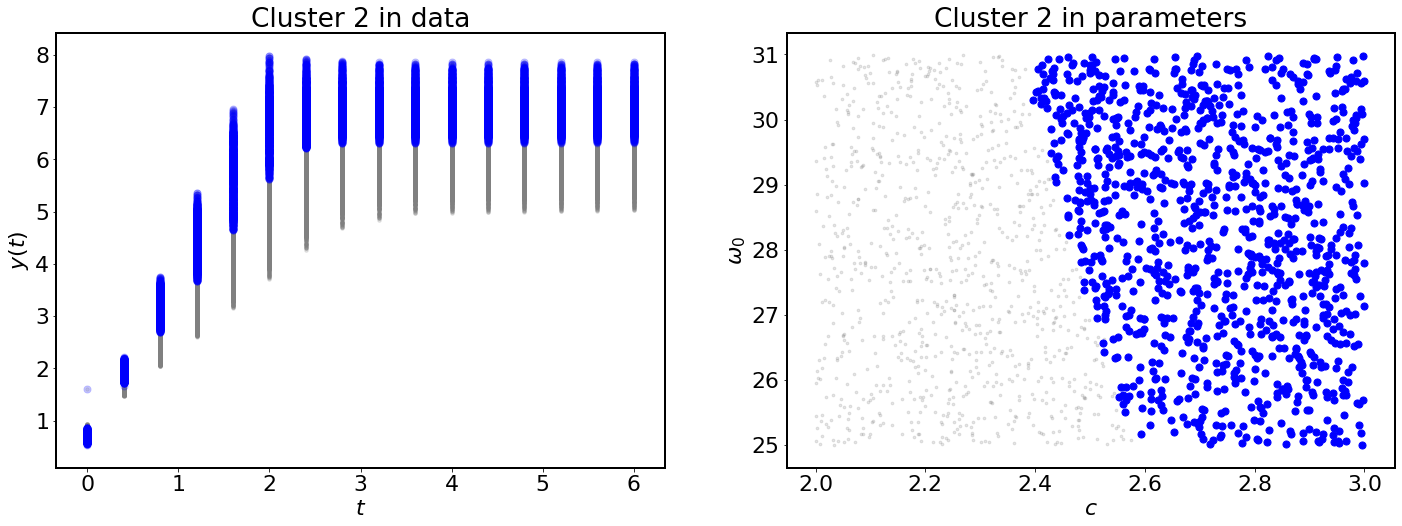

In [10]:
# # Plot clusters of predicted time series

for j in range(learn.num_clusters):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8), gridspec_kw={'width_ratios': [1, 1]}) 
    ax1.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 50, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    ax1.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 50, c='b', marker='o', alpha=0.2)
    ax1.set(title='Cluster ' + str(j+1) + ' in data')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$y(t)$')
    
    ax2.scatter(params[:,1], params[:,2], 30, c='gray', marker='.', alpha=0.2)
    ax2.scatter(params[idx,1], params[idx,2], 50, c='blue', marker='o')
    ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
    ax2.set_ylabel('$\omega_0$')
    ax2.set_xlabel('$c$')
    fig.tight_layout

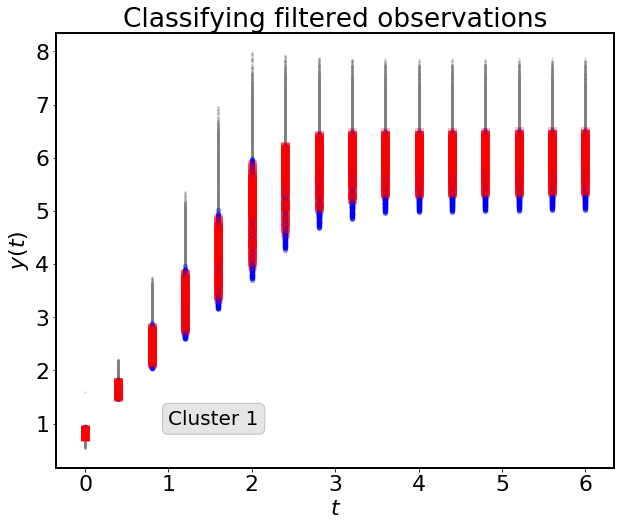

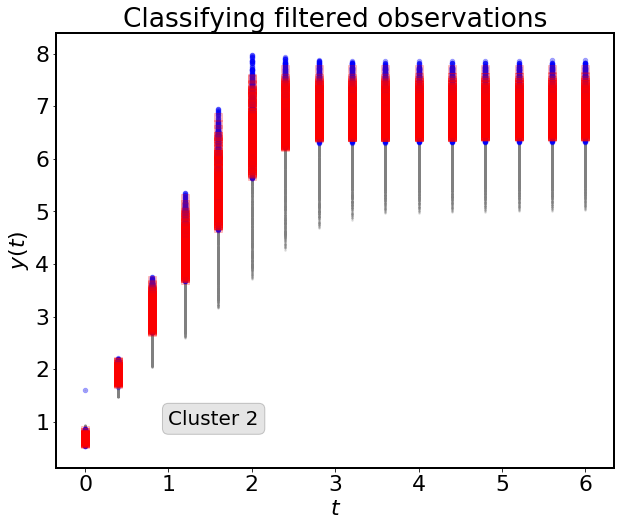

In [11]:
## # Plot oberved and predicted clusters

for j in range(learn.num_clusters):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 10, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 20, c='b', marker='o', alpha=0.3)
    idx = np.where(learn.obs_labels == j)[0]    
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_obs[idx, :], 50, c='r', marker='s', alpha=0.2)
    plt.title('Classifying filtered observations')
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    bottom, top = plt.gca().get_ylim()
    props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
    plt.text(1, (top-bottom)*0.1+bottom, 
             'Cluster ' + str(j+1), 
             {'color': 'k', 'fontsize': 20},
             bbox=props)
    plt.text
    fig.tight_layout

In [12]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=3)

3 PCs explain 99.8565% of var. for cluster 1 with {'kernel': 'linear'}
3 PCs explain 81.2589% of var. for cluster 1 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
3 PCs explain 0.0000% of var. for cluster 1 with {'kernel': 'sigmoid'}
3 PCs explain 95.4950% of var. for cluster 1 with {'kernel': 'poly'}
3 PCs explain 99.2536% of var. for cluster 1 with {'kernel': 'cosine'}
---------------------------------------------
Best kPCA for cluster  1  is  {'kernel': 'linear'}
3 PCs explain 99.8565% of variance.
---------------------------------------------
3 PCs explain 99.6059% of var. for cluster 2 with {'kernel': 'linear'}
3 PCs explain 74.8443% of var. for cluster 2 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
3 PCs explain 0.0000% of var. for cluster 2 with {'kernel': 'sigmoid'}
3 PCs explain 90.9165% of var. for cluster 2 with {'kernel': 'poly'}
3 PCs explain 99.4538% of var. for cluster 2 with {'kernel': 'cosine'}
---------------------------------------------

In [13]:
%reset -f out

def plot_gap(all_eig_vals, n, cluster):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    #Plotting until maximum number of knots
    eig_vals = all_eig_vals[cluster].lambdas_[0:10]
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals/np.sum(eig_vals)*100, Marker='.', MarkerSize=20, linestyle='')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'k--')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n+1]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'r--')
    plt.text(n+1, eig_vals[n]/np.sum(eig_vals)*150, 
             r'%2.3f' %(np.sum(eig_vals[0:n+1])/np.sum(eig_vals)*100) + '% of variation explained by first ' + '%1d' %(n+1) + ' PCs.', 
                                                               {'color': 'k', 'fontsize': 20})
    plt.text(n+2, eig_vals[n+1]/np.sum(eig_vals)*150, 
             r'Order of magnitude of gap is %4.2f.' %(np.log10(eig_vals[n])-np.log10(eig_vals[n+1])), 
                                                               {'color': 'r', 'fontsize': 20})
    s = 'Determining QoI for cluster #%1d' %(cluster+1)
    plt.title(s)
    plt.xlabel('Principal Component #')
    plt.ylabel('% of Variation')
    plt.xlim([0.1, np.size(eig_vals)+1])
    plt.ylim([0,500])


wd.interact(plot_gap, all_eig_vals=wd.fixed(learn.kpcas),
            n = wd.IntSlider(value=0, min=0, max=5),
            cluster = wd.IntSlider(value=0, min=0, max=learn.num_clusters-1))

Flushing output cache (3 entries)


interactive(children=(IntSlider(value=0, description='n', max=5), IntSlider(value=0, description='cluster', ma…

<function __main__.plot_gap(all_eig_vals, n, cluster)>

In [14]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

Diagnostic for clusters [sample average of ratios in each cluster]: [1.0091316551872545, 1.3563614539320772]


In [15]:
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(0, num_params):
    true_param_marginals.append(GKDE(params_obs[:,params_to_vary[i]]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
    
# for i in range(ics.shape[1]):
#     true_ic_marginals.append(GKDE(ics_obs[:,i]))
#     ic_marginals.append([])
#     for j in range(learn.num_clusters):
#         ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [16]:
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

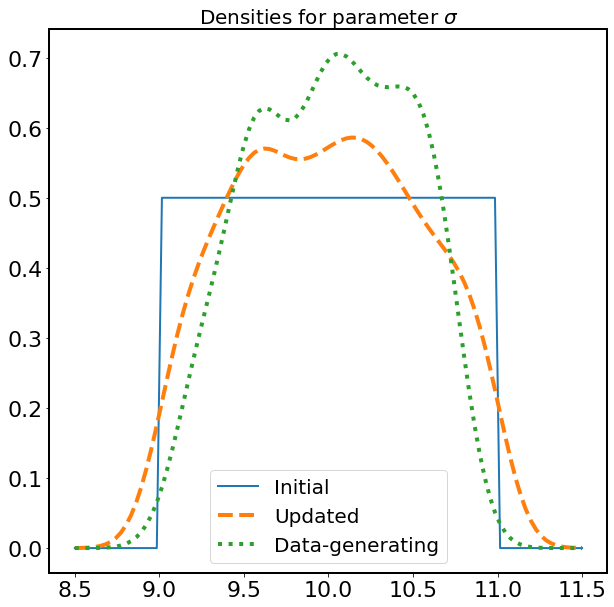

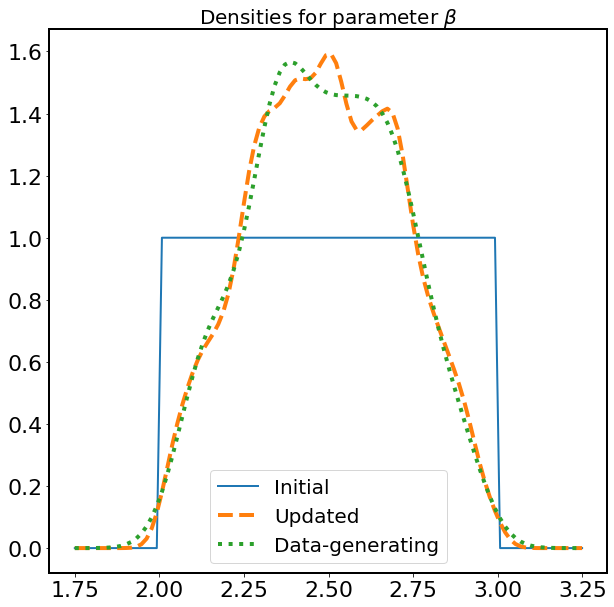

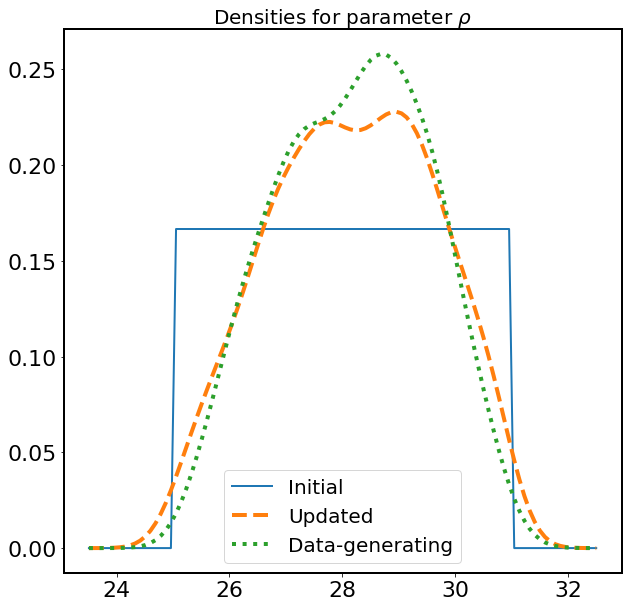

In [18]:
for i in range(0, num_params):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial', linewidth=2)
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
    plt.plot(x, true_param_marginals[i](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
    plt.title('Densities for parameter ' + param_labels[i], fontsize=20)
    plt.legend(fontsize=20)

In [53]:
# for i in range(ics.shape[1]):
#     fig = plt.figure(figsize=(10,10))
#     fig.clear()
#     x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
#     x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
#     delt = 0.25*(x_max - x_min)
#     x = np.linspace(x_min-delt, x_max+delt, 100)
#     plt.plot(x, unif_dist(x, ic_range[i, :]),
#          label = 'Initial')
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += ic_marginals[i][j](x) * cluster_weights[j]
#     plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
#     plt.plot(x, true_ic_marginals[i](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
#     plt.title('Densities for initial condition ' + ic_labels[i], fontsize=20)
#     plt.legend(fontsize=20)

### Compute TV metric between densities

In [19]:
import scipy.integrate.quadrature as quad

In [21]:
def param_init_error(x):
    return np.abs(unif_dist(x,param_range[param_num, :])-true_param_marginals[param_num](x))

# for i in range(params.shape[1]):
for i in range(0, num_params):
    param_num=i
    TV_metric = quad(param_init_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.3512090582490251, 1.40512674828841e-08)
(0.4189146914968343, 8.512427596141237e-09)
(0.39605388481262227, 1.3482504279682672e-08)


In [22]:
def param_update_KDE_error(x):
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[param_num][j](x) * cluster_weights[j]
    return np.abs(mar-true_param_marginals[param_num](x))

# for i in range(params.shape[1]):
for i in range(0,num_params):
    param_num=i
    TV_metric = quad(param_update_KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.19601782095687081, 3.0909771964182653e-09)


/home/kirana/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:251: AccuracyWarning: maxiter (1000) exceeded. Latest difference = 2.888675e-06
  AccuracyWarning)


(0.04869302936124437, 2.888675405876562e-06)
(0.08820343081990051, 1.0630572339076494e-08)


In [23]:
from scipy.stats import beta 

In [24]:
def KDE_error(x):
    true_beta = beta(a=true_a, b=true_b,loc=param_range[i,0],scale=param_range[i,1]-param_range[i,0])
    return np.abs(true_beta.pdf(x)-true_param_marginals[param_num](x))

# for i in range(params.shape[1]):
for i in range(0,num_params):
    param_num=i
    TV_metric = quad(KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.08364512633585693, 1.4705753711985459e-08)
(0.07177011463054807, 3.3543430255633666e-09)
(0.11376520608764684, 4.352483748415459e-09)


### Compute KL divergence

In [24]:
# def KL_margs_init(x):
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  unif_dist(x,param_range[param_num, :])))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)

In [25]:
# def KL_margs_updated(x):
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += param_marginals[param_num][j](x) * cluster_weights[j]
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  mar))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs_updated,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)